# 課程: Python程式語言應用專題報告
# 主題: 股價預測
# 學號: 168
# 姓名: 李明昌
# 日期: 2024年10月10日

In [2]:
# 注意:
# 1. 本研究使用 Jupyter notebook 撰寫, 版本如下:
# !jupyter --version

In [3]:
# 2. 將 Jupyter notebook 轉換為 py 方法如下:
# !jupyter nbconvert --to script report_168_alan.ipynb

In [4]:
# 3. 下載舊版 Anaconda
# 下載最新版 Anaconda: https://www.anaconda.com/download
# 如果 Jupyter notebook 使用時有異常, 可以下載舊版 Anaconda.
# https://repo.anaconda.com/archive/
# 範例： Anaconda3-2024.02-1-Windows-x86_64.exe.
# https://repo.anaconda.com/archive/Anaconda3-2024.02-1-Windows-x86_64.exe

In [5]:
# 4.報告規範:
# https://github.com/rwepa/python_data_scientist/blob/main/report_readme.txt

# 1.商業理解

In [7]:
# 研究目的: 探討使用機器學習的監督式學習進行股票的預測 
# 資料來源: Machine Learning and Data Science Blueprints for Finance, 2020.
# URL: https://www.amazon.com/Machine-Learning-Science-Blueprints-Finance/dp/1492073059
# 報告名稱: report_stock_prediction.ipynb

研究的目標是建立一個機器學習模型, 使用監督式學習的演算法, 參考技術指標與基本面資料. 對股票價格進行預測並提供決策參考.

預測的反應變數為微軟股票的週報酬率(Weekly return of Microsoft stock).

研究的獨立變數(Independent variables)包括:

+ IBM股票
+ Google股票
+ 美元／日元(USD/JPY)貨幣
+ 英鎊／美元匯率(GBP/USD)貨幣
+ 標準普爾500指數(S&P 500), 參考: https://zh.wikipedia.org/wiki/S%26P_500
+ 道瓊工業指數(Dow Jones Industrial Average Index, 簡稱Dow Jones, Dow), 參考: https://zh.wikipedia.org/wiki/道琼斯工业平均指数
+ 波動率指數(芝加哥選擇權交易所市場波動率指數, VIX), 參考: https://zh.wikipedia.org/wiki/VIX指数

# 2.資料理解

資料理解包括以下主題, 其中資料匯入與資料摘要為必需主題:

+ 資料匯入
+ 資料摘要
+ 探索性資料分析
+ 資料視覺化
+ 資料清理
+ 資料合併
+ 特徵選擇
+ 資料轉換

本研究使用 Python 程式語言(Python, 2024)並參考RWEPA網站資料(Lee, 2024)與Tatsat et al.(2020).

## 2.1 模組與資料匯入

In [12]:
# 讀取股票模組
# 原範例使用 pandas_datareader 讀取股票資料會有錯誤, 已經修改使用 yfinance 模組讀取股票資料.
# 參考: https://github.com/ranaroussi/yfinance
# pip install yfinance
import yfinance as yf

# 使用 pandas_datareader 模組讀取貨幣,指標資料結果為正常顯示.
# pip install pandas_datareader
import pandas_datareader.data as web

In [13]:
# 載入監督式迴歸模型
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

In [14]:
# Function and modules for data analysis and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

In [15]:
# Function and modules for data preparation and visualization
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

In [16]:
# 設定股票代號
stk_tickers = ['MSFT', 'IBM', 'GOOGL']

# 設定貨幣代號
ccy_tickers = ['DEXJPUS', 'DEXUSUK']

# 設定指數代號
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']

In [17]:
# 設定開始日期
start = "2010-1-1"
start

'2010-1-1'

In [18]:
# 設定結束日期
end = "2024-10-10"
end

'2024-10-10'

In [19]:
# 1.載入股票資料
# df = web.DataReader("MSFT", "yahoo", start, end)
# AttributeError: 'NoneType' object has no attribute 'group'

<div class="alert alert-block alert-info">
<b>注意: </b>因 yahoo參數已更新, 但 pandas_datareader.DataReader 尚未更新會有錯誤. 部分資料擷取改用 yfinace.download.
</div>

In [21]:
# 改用 yfinace 模組
# 使用 MSFT 指標測試
import yfinance as yf
tmp = yf.download("MSFT")
tmp # Open, High, Low, Close, Adj Close, Volume

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400
...,...,...,...,...,...,...
2024-10-07,416.000000,417.109985,409.000000,409.540009,409.540009,20919800
2024-10-08,410.899994,415.660004,408.170013,414.709991,414.709991,19229300
2024-10-09,415.859985,420.380005,414.299988,417.459991,417.459991,14974300


In [22]:
stk_data = yf.download(stk_tickers)
stk_data

[*********************100%***********************]  3 of 3 completed


Price                       Adj Close                               Close  \
Ticker                          GOOGL         IBM        MSFT       GOOGL   
Date                                                                        
1962-01-02 00:00:00+00:00         NaN    1.513320         NaN         NaN   
1962-01-03 00:00:00+00:00         NaN    1.526550         NaN         NaN   
1962-01-04 00:00:00+00:00         NaN    1.511337         NaN         NaN   
1962-01-05 00:00:00+00:00         NaN    1.481573         NaN         NaN   
1962-01-08 00:00:00+00:00         NaN    1.453794         NaN         NaN   
...                               ...         ...         ...         ...   
2024-10-07 00:00:00+00:00  162.979996  227.119995  409.540009  162.979996   
2024-10-08 00:00:00+00:00  164.380005  228.619995  414.709991  164.380005   
2024-10-09 00:00:00+00:00  161.860001  234.300003  417.459991  161.860001   
2024-10-10 00:00:00+00:00  162.080002  233.020004  415.839996  162.080002   
2024-10-11 00:00:00+00:00  163.240005  233.259995  416.320007  163.240005   

Price                                                    High              \
Ticker                            IBM        MSFT       GOOGL         IBM   
Date                                                                        
1962-01-02 00:00:00+00:00    7.291268         NaN         NaN    7.374124   
1962-01-03 00:00:00+00:00    7.355003         NaN         NaN    7.355003   
1962-01-04 00:00:00+00:00    7.281708         NaN         NaN    7.355003   
1962-01-05 00:00:00+00:00    7.138305         NaN         NaN    7.272148   
1962-01-08 00:00:00+00:00    7.004461         NaN         NaN    7.131931   
...                               ...         ...         ...         ...   
2024-10-07 00:00:00+00:00  227.119995  409.540009  168.479996  227.669998   
2024-10-08 00:00:00+00:00  228.619995  414.709991  164.729996  229.350006   
2024-10-09 00:00:00+00:00  234.300003  417.459991  164.839996  234.949997   
2024-10-10 00:00:00+00:00  233.020004  415.839996  163.070007  235.830002   
2024-10-11 00:00:00+00:00  233.259995  416.320007  163.899994  233.440002   

Price                                         Low                          \
Ticker                           MSFT       GOOGL         IBM        MSFT   
Date                                                                        
1962-01-02 00:00:00+00:00         NaN         NaN    7.291268         NaN   
1962-01-03 00:00:00+00:00         NaN         NaN    7.291268         NaN   
1962-01-04 00:00:00+00:00         NaN         NaN    7.278521         NaN   
1962-01-05 00:00:00+00:00         NaN         NaN    7.125558         NaN   
1962-01-08 00:00:00+00:00         NaN         NaN    6.947100         NaN   
...                               ...         ...         ...         ...   
2024-10-07 00:00:00+00:00  417.109985  162.750000  225.020004  409.000000   
2024-10-08 00:00:00+00:00  415.660004  162.869995  227.039993  408.170013   
2024-10-09 00:00:00+00:00  420.380005  159.740005  228.500000  414.299988   
2024-10-10 00:00:00+00:00  417.350006  160.399994  231.809998  413.149994   
2024-10-11 00:00:00+00:00  417.130005  161.240005  230.460007  413.250000   

Price                            Open                              Volume  \
Ticker                          GOOGL         IBM        MSFT       GOOGL   
Date                                                                        
1962-01-02 00:00:00+00:00         NaN    7.374124         NaN         NaN   
1962-01-03 00:00:00+00:00         NaN    7.291268         NaN         NaN   
1962-01-04 00:00:00+00:00         NaN    7.355003         NaN         NaN   
1962-01-05 00:00:00+00:00         NaN    7.272148         NaN         NaN   
1962-01-08 00:00:00+00:00         NaN    7.131931         NaN         NaN   
...                               ...         ...         ...         ...   
2024-10-07 00:00:00+00:00  167.720001  225.380005  416.000000  2246310

In [23]:
type(stk_data) # pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

In [24]:
# DataFrame with MultiIndex (多重指標)
# 欄位名稱
stk_data.columns

MultiIndex([('Adj Close', 'GOOGL'),
            ('Adj Close',   'IBM'),
            ('Adj Close',  'MSFT'),
            (    'Close', 'GOOGL'),
            (    'Close',   'IBM'),
            (    'Close',  'MSFT'),
            (     'High', 'GOOGL'),
            (     'High',   'IBM'),
            (     'High',  'MSFT'),
            (      'Low', 'GOOGL'),
            (      'Low',   'IBM'),
            (      'Low',  'MSFT'),
            (     'Open', 'GOOGL'),
            (     'Open',   'IBM'),
            (     'Open',  'MSFT'),
            (   'Volume', 'GOOGL'),
            (   'Volume',   'IBM'),
            (   'Volume',  'MSFT')],
           names=['Price', 'Ticker'])

In [25]:
type(stk_data.columns) # pandas.core.indexes.multi.MultiIndex

pandas.core.indexes.multi.MultiIndex

In [26]:
stk_data.index # DatetimeIndex with datetime64

DatetimeIndex(['1962-01-02 00:00:00+00:00', '1962-01-03 00:00:00+00:00',
               '1962-01-04 00:00:00+00:00', '1962-01-05 00:00:00+00:00',
               '1962-01-08 00:00:00+00:00', '1962-01-09 00:00:00+00:00',
               '1962-01-10 00:00:00+00:00', '1962-01-11 00:00:00+00:00',
               '1962-01-12 00:00:00+00:00', '1962-01-15 00:00:00+00:00',
               ...
               '2024-09-30 00:00:00+00:00', '2024-10-01 00:00:00+00:00',
               '2024-10-02 00:00:00+00:00', '2024-10-03 00:00:00+00:00',
               '2024-10-04 00:00:00+00:00', '2024-10-07 00:00:00+00:00',
               '2024-10-08 00:00:00+00:00', '2024-10-09 00:00:00+00:00',
               '2024-10-10 00:00:00+00:00', '2024-10-11 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=15803, freq=None)

In [27]:
type(stk_data.index) # pandas.core.indexes.datetimes.DatetimeIndex

pandas.core.indexes.datetimes.DatetimeIndex

In [28]:
# 篩選研究日期範圍
mask = (stk_data.index >= start) & (stk_data.index <= end)
stk_data = stk_data.loc[mask]
stk_data # 3718*18

Price                       Adj Close                               Close  \
Ticker                          GOOGL         IBM        MSFT       GOOGL   
Date                                                                        
2010-01-04 00:00:00+00:00   15.645692   75.353790   23.347322   15.684434   
2010-01-05 00:00:00+00:00   15.576794   74.443504   23.354864   15.615365   
2010-01-06 00:00:00+00:00   15.184123   73.959923   23.211536   15.221722   
2010-01-07 00:00:00+00:00   14.830644   73.703918   22.970140   14.867367   
2010-01-08 00:00:00+00:00   15.028353   74.443504   23.128557   15.065566   
...                               ...         ...         ...         ...   
2024-10-04 00:00:00+00:00  167.059998  226.000000  416.059998  167.059998   
2024-10-07 00:00:00+00:00  162.979996  227.119995  409.540009  162.979996   
2024-10-08 00:00:00+00:00  164.380005  228.619995  414.709991  164.380005   
2024-10-09 00:00:00+00:00  161.860001  234.300003  417.459991  161.860001   
2024-10-10 00:00:00+00:00  162.080002  233.020004  415.839996  162.080002   

Price                                                    High              \
Ticker                            IBM        MSFT       GOOGL         IBM   
Date                                                                        
2010-01-04 00:00:00+00:00  126.625237   30.950001   15.753504  127.122368   
2010-01-05 00:00:00+00:00  125.095604   30.959999   15.711712  126.051628   
2010-01-06 00:00:00+00:00  124.282982   30.770000   15.662162  125.707458   
2010-01-07 00:00:00+00:00  123.852776   30.450001   15.265265  124.521988   
2010-01-08 00:00:00+00:00  125.095604   30.660000   15.096346  125.162521   
...                               ...         ...         ...         ...   
2024-10-04 00:00:00+00:00  226.000000  416.059998  168.229996  226.080002   
2024-10-07 00:00:00+00:00  227.119995  409.540009  168.479996  227.669998   
2024-10-08 00:00:00+00:00  228.619995  414.709991  164.729996  229.350006   
2024-10-09 00:00:00+00:00  234.300003  417.459991  164.839996  234.949997   
2024-10-10 00:00:00+00:00  233.020004  415.839996  163.070007  235.830002   

Price                                         Low                          \
Ticker                           MSFT       GOOGL         IBM        MSFT   
Date                                                                        
2010-01-04 00:00:00+00:00   31.100000   15.621622  125.095604   30.590000   
2010-01-05 00:00:00+00:00   31.100000   15.554054  124.378586   30.639999   
2010-01-06 00:00:00+00:00   31.080000   15.174174  124.101341   30.520000   
2010-01-07 00:00:00+00:00   30.700001   14.831081  123.240921   30.190001   
2010-01-08 00:00:00+00:00   30.879999   14.742492  123.374763   30.240000   
...                               ...         ...         ...         ...   
2024-10-04 00:00:00+00:00  419.750000  165.479996  223.270004  414.970001   
2024-10-07 00:00:00+00:00  417.109985  162.750000  225.020004  409.000000   
2024-10-08 00:00:00+00:00  415.660004  162.869995  227.039993  408.170013   
2024-10-09 00:00:00+00:00  420.380005  159.740005  228.500000  414.299988   
2024-10-10 00:00:00+00:00  417.350006  160.399994  231.809998  413.149994   

Price                            Open                               Volume  \
Ticker                          GOOGL         IBM        MSFT        GOOGL   
Date                                                                         
2010-01-04 00:00:00+00:00   15.689439  125.411087   30.620001   78169752.0   
2010-01-05 00:00:00+00:00   15.695195  125.889099   30.850000  120067812.0   
2010-01-06 00:00:00+00:00   15.662162  124.933075   30.879999  158988852.0   
2010-01-07 00:00:00+00:00   15.250250  124.158699   30.629999  256315428.0   
2010-01-08 00:00:00+00:00   14.814815  123.393883   30.280001  188783028.0   
...                               ...         ...         ...          ...   
2024-10-04 00:00:00+00:00  168.059998  223.750000  418.239990

In [29]:
# 2.載入貨幣資料
ccy_data = web.DataReader(ccy_tickers, "fred", start, end)
ccy_data # 3851*2

,DEXJPUS,DEXUSUK
DATE,,
2010-01-01,NaN,NaN
2010-01-04,92.55,1.6109
2010-01-05,91.48,1.6009
2010-01-06,92.53,1.6016
2010-01-07,93.31,1.5912
...,...,...
2024-09-30,143.25,1.3399
2024-10-01,143.66,1.3282
2024-10-02,146.05,1.3271


In [30]:
# 3.載入指數資料
idx_data = web.DataReader(idx_tickers, "fred", start, end)
idx_data # 3855*3

,SP500,DJIA,VIXCLS
DATE,,,
2010-01-01,NaN,NaN,NaN
2010-01-04,NaN,NaN,20.04
2010-01-05,NaN,NaN,19.35
2010-01-06,NaN,NaN,19.16
2010-01-07,NaN,NaN,19.06
...,...,...,...
2024-10-04,5751.07,42352.75,19.21
2024-10-07,5695.94,41954.24,22.64
2024-10-08,5751.13,42080.37,21.42


In [31]:
# 在資料分析的心法中提及三大技巧: 1群組 2時間 3建立評變數.
# 本研究加入建立評估變,  其中 MSFT 的落後5日, 15日, 30日, 60日票平均報酬率為新增建立的評估變數

In [32]:
# 考慮一週的交易日數為5天, 設定5日的報酬基準
return_period = 5

In [33]:
# 取出 multiple index value
stk_data.loc[:, ('Adj Close', 'MSFT')]

Date
2010-01-04 00:00:00+00:00     23.347322
2010-01-05 00:00:00+00:00     23.354864
2010-01-06 00:00:00+00:00     23.211536
2010-01-07 00:00:00+00:00     22.970140
2010-01-08 00:00:00+00:00     23.128557
                                ...    
2024-10-04 00:00:00+00:00    416.059998
2024-10-07 00:00:00+00:00    409.540009
2024-10-08 00:00:00+00:00    414.709991
2024-10-09 00:00:00+00:00    417.459991
2024-10-10 00:00:00+00:00    415.839996
Name: (Adj Close, MSFT), Length: 3718, dtype: float64

In [34]:
# 計算 log 轉換與落後5日
# 2024年10月1,2,3,4,7,8,9,10日
# 2024年10月10日的5日差異=2024.10.10 - 2024.10.3
np.log(stk_data.loc[:, ('Adj Close', 'MSFT')]).diff(return_period)

Date
2010-01-04 00:00:00+00:00         NaN
2010-01-05 00:00:00+00:00         NaN
2010-01-06 00:00:00+00:00         NaN
2010-01-07 00:00:00+00:00         NaN
2010-01-08 00:00:00+00:00         NaN
                               ...   
2024-10-04 00:00:00+00:00   -0.028340
2024-10-07 00:00:00+00:00   -0.049448
2024-10-08 00:00:00+00:00   -0.014317
2024-10-09 00:00:00+00:00    0.000791
2024-10-10 00:00:00+00:00   -0.001682
Name: (Adj Close, MSFT), Length: 3718, dtype: float64

In [35]:
# np.log 自然對數
# diff 計算落後5天報酬
# shift: 正數表示整列向下移動, 負數表示整列向上移動
Y = np.log(stk_data.loc[:, ('Adj Close', 'MSFT')]).diff(return_period).shift(-return_period)
Y.name = Y.name[-1]+'_pred'
Y

Date
2010-01-04 00:00:00+00:00   -0.022216
2010-01-05 00:00:00+00:00   -0.029168
2010-01-06 00:00:00+00:00   -0.013743
2010-01-07 00:00:00+00:00    0.016610
2010-01-08 00:00:00+00:00    0.006502
                               ...   
2024-10-04 00:00:00+00:00         NaN
2024-10-07 00:00:00+00:00         NaN
2024-10-08 00:00:00+00:00         NaN
2024-10-09 00:00:00+00:00         NaN
2024-10-10 00:00:00+00:00         NaN
Name: MSFT_pred, Length: 3718, dtype: float64

In [36]:
# pandas 序列(Series)物件
# https://github.com/rwepa/python_data_scientist/blob/main/2024-01.python_tutorial.py#L1112
type(Y) # pandas.core.series.Series

pandas.core.series.Series

In [37]:
# X1: Google, IBM-5日股票報酬
X1 = np.log(stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM'))]).diff(return_period).dropna()
X1.columns = X1.columns.droplevel()
X1 # 3713*2

Ticker,GOOGL,IBM
Date,,
2010-01-11 00:00:00+00:00,-0.041770,-0.022679
2010-01-12 00:00:00+00:00,-0.055198,-0.002602
2010-01-13 00:00:00+00:00,-0.035424,0.001768
2010-01-14 00:00:00+00:00,-0.007179,0.021081
2010-01-15 00:00:00+00:00,-0.037263,0.007083
...,...,...
2024-10-04 00:00:00+00:00,0.018792,0.023097
2024-10-07 00:00:00+00:00,-0.017456,0.026954
2024-10-08 00:00:00+00:00,-0.015753,0.041393


In [38]:
# X2: USD/JPY, GBP/USD 5日股票報酬
X2 = np.log(ccy_data).diff(return_period).dropna()
X2 #3546*2

,DEXJPUS,DEXUSUK
DATE,,
2010-01-11,-0.007048,0.002294
2010-01-12,-0.005810,0.010687
2010-01-13,-0.012506,0.016840
2010-01-14,-0.024738,0.025318
2010-01-15,-0.020819,0.015326
...,...,...
2024-09-30,-0.002371,0.003589
2024-10-01,-0.000765,-0.007052
2024-10-02,0.011293,-0.005036


In [39]:
# X3: S&P 500, Dow Jones, VTX 5日股票報酬 
X3 = np.log(idx_data).diff(return_period).dropna()
X3 # 2426*3

,SP500,DJIA,VIXCLS
DATE,,,
2014-10-20,0.015492,0.004804,-0.282824
2014-10-21,0.033300,0.018198,-0.348746
2014-10-22,0.034107,0.019605,-0.384543
2014-10-23,0.046191,0.034195,-0.421667
2014-10-24,0.040417,0.025615,-0.311148
...,...,...,...
2024-10-04,0.002246,0.000939,0.124573
2024-10-07,-0.011614,-0.008920,0.302515
2024-10-08,0.007396,-0.001819,0.106295


<div class="alert alert-block alert-info">
<b>注意: </b>使用資料分析的心法-建立評估變數X4.
</div>

In [41]:
# X4: 將時間序列資料重新建構為基於監督式學習-迴歸模型架構
# pd.concat(..., axis=1) 表示行的左右合併
# for 迴圈表示依序針對{1週期日,3週期日,6週期日,12週期日}計算調整後收盤價的報酬.
# dropna() 表示刪除資料列中有任何一行為 nan 值.
X4 = pd.concat([np.log(stk_data.loc[:, ('Adj Close', 'MSFT')]).diff(i) for i in [return_period, return_period*3, return_period*6, return_period*12]], axis=1).dropna()

X4.columns = ['MSFT_DT', 'MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']
X4 # 3658*4

,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT
Date,,,,
2010-03-31 00:00:00+00:00,-0.012216,0.010986,0.024189,-0.050461
2010-04-01 00:00:00+00:00,-0.028733,-0.000686,0.006537,-0.055233
2010-04-05 00:00:00+00:00,-0.013236,0.000000,0.017230,-0.045312
2010-04-06 00:00:00+00:00,-0.009166,0.001024,0.020328,-0.033151
2010-04-07 00:00:00+00:00,-0.014209,-0.000681,0.035372,-0.039001
...,...,...,...,...
2024-10-04 00:00:00+00:00,-0.028340,-0.034327,0.001227,-0.087008
2024-10-07 00:00:00+00:00,-0.049448,-0.051862,-0.017548,-0.100270
2024-10-08 00:00:00+00:00,-0.014317,-0.048111,0.002946,-0.088629


<div class="alert alert-block alert-info">
<b>注意: </b>本研究因為各資料集 index 資料型態不相同, 因此須先進行 pd.to_datetime() 資料轉換.
</div>

In [43]:
# 將 X1, X2, X3, X4 執行資料行合併
# https://pandas.pydata.org/docs/reference/api/pandas.concat.html

# 因為 index 資料型態不相同, 因此直接合併會有錯誤.
# TypeError: Cannot join tz-naive with tz-aware DatetimeIndex
# X = pd.concat([X1, X2, X3, X4], axis=1)

In [44]:
# 理解各資料 index 資料型態
X1.index.dtype # datetime64[ns, UTC]

datetime64[ns, UTC]

In [45]:
X2.index.dtype # dtype('<M8[ns]')

dtype('<M8[ns]')

In [46]:
X3.index.dtype # dtype('<M8[ns]')

dtype('<M8[ns]')

In [47]:
X4.index.dtype # datetime64[ns, UTC]

datetime64[ns, UTC]

In [48]:
# 將 X2.index, X3.index 轉換為 datetime64[ns, UTC]
X2.index = pd.to_datetime(X2.index, utc=True)
X2.index.dtype # datetime64[ns, UTC]

X3.index = pd.to_datetime(X3.index, utc=True)
X3.index.dtype # datetime64[ns, UTC]

datetime64[ns, UTC]

In [49]:
# 資料合併
X = pd.concat([X1, X2, X3, X4], axis=1).dropna()
X # 2368*11

,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT
2014-10-21 00:00:00+00:00,-0.019619,-0.118688,-0.004209,0.012725,0.033300,0.018198,-0.348746,0.025958,-0.032445,-0.041036,0.026711
2014-10-22 00:00:00+00:00,0.003618,-0.116333,0.011810,0.006931,0.034107,0.019605,-0.384543,0.026486,-0.033676,-0.053949,0.017329
2014-10-23 00:00:00+00:00,0.030684,-0.103361,0.020361,-0.001744,0.046191,0.034195,-0.421667,0.051971,-0.016304,-0.043041,0.038734
2014-10-24 00:00:00+00:00,0.048392,-0.116191,0.012478,0.000746,0.040417,0.025615,-0.311148,0.055718,0.000868,-0.012281,0.072776
2014-10-27 00:00:00+00:00,0.032343,-0.043697,0.007829,-0.000248,0.029814,0.025185,-0.146462,0.040677,-0.003913,-0.007162,0.074970
...,...,...,...,...,...,...,...,...,...,...,...
2024-09-30 00:00:00+00:00,0.024414,0.002627,-0.002371,0.003589,0.007649,0.004867,0.051514,-0.007432,0.058819,0.027877,-0.081244
2024-10-01 00:00:00+00:00,0.028549,-0.007358,-0.000765,-0.007052,-0.004227,-0.001215,0.224312,-0.019957,0.015547,-0.001995,-0.101004
2024-10-02 00:00:00+00:00,0.026701,-0.006803,0.011293,-0.005036,-0.002225,0.006700,0.204145,-0.035282,-0.014069,-0.018221,-0.095027
2024-10-03 00:00:00+00:00,0.019052,-0.003183,0.014683,-0.023662,-0.007939,-0.003885,0.287519,-0.034845,-0.024801,-0.018081,-0.110939


In [50]:
# 合併 Y, X
dataset = pd.concat([Y, X], axis=1).dropna().iloc[::return_period, :]
dataset

,MSFT_pred,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT
2014-10-21 00:00:00+00:00,0.035245,-0.019619,-0.118688,-0.004209,0.012725,0.033300,0.018198,-0.348746,0.025958,-0.032445,-0.041036,0.026711
2014-10-28 00:00:00+00:00,0.022966,0.038128,0.002264,0.012110,0.001425,0.022297,0.023257,-0.111043,0.035245,0.020866,-0.005791,0.075695
2014-11-04 00:00:00+00:00,0.026961,0.009349,-0.005823,0.049143,-0.010327,0.013535,0.021990,0.034156,0.022966,0.084168,0.021461,0.102588
2014-11-12 00:00:00+00:00,-0.005259,0.004129,0.007439,0.006955,-0.010629,0.007228,0.007275,-0.084640,0.019040,0.094531,0.060855,0.073351
2014-11-20 00:00:00+00:00,-0.018444,-0.023051,-0.013295,0.021475,-0.002166,0.006559,0.003744,-0.015346,-0.012226,0.062239,0.066591,0.088197
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-03 00:00:00+00:00,0.011559,-0.054415,0.016531,0.010756,-0.010024,-0.017369,-0.007631,0.294786,-0.009843,0.008245,-0.076843,-0.034368
2024-09-11 00:00:00+00:00,0.018200,-0.033072,0.027925,-0.018110,-0.008789,0.006151,-0.002768,-0.186646,0.033996,-0.004152,0.002084,-0.043331
2024-09-18 00:00:00+00:00,0.003013,0.055647,0.023775,0.001481,0.013117,0.011480,0.015575,0.030069,0.018200,0.040188,0.076979,-0.036588
2024-09-25 00:00:00+00:00,-0.035282,0.010458,0.028844,0.017322,0.010476,0.018342,0.009870,-0.168052,0.003013,0.055210,0.044591,-0.053611


In [51]:
# 反應變數
Y = dataset.loc[:, Y.name]
Y

2014-10-21 00:00:00+00:00    0.035245
2014-10-28 00:00:00+00:00    0.022966
2014-11-04 00:00:00+00:00    0.026961
2014-11-12 00:00:00+00:00   -0.005259
2014-11-20 00:00:00+00:00   -0.018444
                               ...   
2024-09-03 00:00:00+00:00    0.011559
2024-09-11 00:00:00+00:00    0.018200
2024-09-18 00:00:00+00:00    0.003013
2024-09-25 00:00:00+00:00   -0.035282
2024-10-02 00:00:00+00:00    0.000791
Name: MSFT_pred, Length: 474, dtype: float64

In [52]:
# 自變數
X = dataset.loc[:, X.columns]
X

,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT
2014-10-21 00:00:00+00:00,-0.019619,-0.118688,-0.004209,0.012725,0.033300,0.018198,-0.348746,0.025958,-0.032445,-0.041036,0.026711
2014-10-28 00:00:00+00:00,0.038128,0.002264,0.012110,0.001425,0.022297,0.023257,-0.111043,0.035245,0.020866,-0.005791,0.075695
2014-11-04 00:00:00+00:00,0.009349,-0.005823,0.049143,-0.010327,0.013535,0.021990,0.034156,0.022966,0.084168,0.021461,0.102588
2014-11-12 00:00:00+00:00,0.004129,0.007439,0.006955,-0.010629,0.007228,0.007275,-0.084640,0.019040,0.094531,0.060855,0.073351
2014-11-20 00:00:00+00:00,-0.023051,-0.013295,0.021475,-0.002166,0.006559,0.003744,-0.015346,-0.012226,0.062239,0.066591,0.088197
...,...,...,...,...,...,...,...,...,...,...,...
2024-09-03 00:00:00+00:00,-0.054415,0.016531,0.010756,-0.010024,-0.017369,-0.007631,0.294786,-0.009843,0.008245,-0.076843,-0.034368
2024-09-11 00:00:00+00:00,-0.033072,0.027925,-0.018110,-0.008789,0.006151,-0.002768,-0.186646,0.033996,-0.004152,0.002084,-0.043331
2024-09-18 00:00:00+00:00,0.055647,0.023775,0.001481,0.013117,0.011480,0.015575,0.030069,0.018200,0.040188,0.076979,-0.036588
2024-09-25 00:00:00+00:00,0.010458,0.028844,0.017322,0.010476,0.018342,0.009870,-0.168052,0.003013,0.055210,0.044591,-0.053611


## 2.2 資料摘要

In [54]:
# 資料物件
type(dataset) # pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

In [55]:
# 資料型態
dataset.dtypes # 所有變數皆為 float64

MSFT_pred    float64
GOOGL        float64
IBM          float64
DEXJPUS      float64
DEXUSUK      float64
SP500        float64
DJIA         float64
VIXCLS       float64
MSFT_DT      float64
MSFT_3DT     float64
MSFT_6DT     float64
MSFT_12DT    float64
dtype: object

In [56]:
# 資料摘要
pd.set_option('display.precision', 4)
dataset.describe(include='all')

,MSFT_pred,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT
count,474.0000,474.0000,474.0000,474.0000,474.0000,474.0000,474.0000,474.0000,474.0000,474.0000,474.0000,474.0000
mean,0.0045,0.0035,0.0008,0.0008,-0.0006,0.0022,0.0018,-0.0020,0.0049,0.0155,0.0286,0.0574
std,0.0351,0.0373,0.0341,0.0128,0.0130,0.0235,0.0233,0.1708,0.0355,0.0547,0.0723,0.0942
min,-0.1787,-0.1679,-0.2312,-0.0672,-0.0727,-0.1980,-0.2087,-0.6219,-0.1787,-0.2823,-0.2289,-0.2977
25%,-0.0139,-0.0163,-0.0141,-0.0056,-0.0079,-0.0075,-0.0068,-0.0794,-0.0122,-0.0124,-0.0159,-0.0035
50%,0.0059,0.0046,0.0024,0.0014,-0.0005,0.0047,0.0042,-0.0096,0.0060,0.0184,0.0344,0.0686
75%,0.0250,0.0258,0.0185,0.0084,0.0066,0.0143,0.0123,0.0694,0.0255,0.0465,0.0780,0.1193
max,0.1423,0.1921,0.1215,0.0491,0.0625,0.0990,0.1157,1.1407,0.1423,0.1687,0.2640,0.3768


反應變數: 

MSFT_pred : 微軟週(5日)報酬率

自變數區分為三大屬性, 合計11個:

1.股票: 6個

2.貨幣: 2個

3.指數: 3個

**股票**

GOOGL   : Google報酬

IBM     : IBM報酬

MSFT_DT : 微軟落後5日報酬

MSFT_3DT: 微軟落後15日報酬

MSFT_6DT: 微軟落後30日報酬

MSFT_12DT: 微軟落後60日報酬

**貨幣**

DEXJPUS : USD/JPY 美元/日元匯率

DEXUSUK : GBP/USD 英鎊/美元匯率

**指數**

SP500   : 標準普爾500指數

DJIA    : 道瓊工業平均指數

VIXCLS  : 芝加哥選擇權交易所市場波動率指數(波動率指數)

## 2.3 探索性資料分析(Exploratory Data Analysis, EDA)

In [59]:
# 資料列數與行數
dataset.shape

(474, 12)

In [60]:
# 欄位名稱
dataset.columns

Index(['MSFT_pred', 'GOOGL', 'IBM', 'DEXJPUS', 'DEXUSUK', 'SP500', 'DJIA',
       'VIXCLS', 'MSFT_DT', 'MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT'],
      dtype='object')

In [61]:
# 檢查 NA 值
dataset.isnull().sum() # 所有變數皆沒有NA值

MSFT_pred    0
GOOGL        0
IBM          0
DEXJPUS      0
DEXUSUK      0
SP500        0
DJIA         0
VIXCLS       0
MSFT_DT      0
MSFT_3DT     0
MSFT_6DT     0
MSFT_12DT    0
dtype: int64

In [62]:
# 顯示前5筆
dataset.head()

,MSFT_pred,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT
2014-10-21 00:00:00+00:00,0.0352,-0.0196,-0.1187,-0.0042,0.0127,0.0333,0.0182,-0.3487,0.0260,-0.0324,-0.0410,0.0267
2014-10-28 00:00:00+00:00,0.0230,0.0381,0.0023,0.0121,0.0014,0.0223,0.0233,-0.1110,0.0352,0.0209,-0.0058,0.0757
2014-11-04 00:00:00+00:00,0.0270,0.0093,-0.0058,0.0491,-0.0103,0.0135,0.0220,0.0342,0.0230,0.0842,0.0215,0.1026
2014-11-12 00:00:00+00:00,-0.0053,0.0041,0.0074,0.0070,-0.0106,0.0072,0.0073,-0.0846,0.0190,0.0945,0.0609,0.0734
2014-11-20 00:00:00+00:00,-0.0184,-0.0231,-0.0133,0.0215,-0.0022,0.0066,0.0037,-0.0153,-0.0122,0.0622,0.0666,0.0882


In [63]:
# 顯示後5筆
dataset.tail()

,MSFT_pred,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT
2024-09-03 00:00:00+00:00,0.0116,-0.0544,0.0165,0.0108,-0.0100,-0.0174,-0.0076,0.2948,-0.0098,0.0082,-0.0768,-0.0344
2024-09-11 00:00:00+00:00,0.0182,-0.0331,0.0279,-0.0181,-0.0088,0.0062,-0.0028,-0.1866,0.0340,-0.0042,0.0021,-0.0433
2024-09-18 00:00:00+00:00,0.0030,0.0556,0.0238,0.0015,0.0131,0.0115,0.0156,0.0301,0.0182,0.0402,0.0770,-0.0366
2024-09-25 00:00:00+00:00,-0.0353,0.0105,0.0288,0.0173,0.0105,0.0183,0.0099,-0.1681,0.0030,0.0552,0.0446,-0.0536
2024-10-02 00:00:00+00:00,0.0008,0.0267,-0.0068,0.0113,-0.0050,-0.0022,0.0067,0.2041,-0.0353,-0.0141,-0.0182,-0.0950


## 2.4 資料視覺化

**相關係數矩陣(correlation coefficient matrix)**

<Axes: title={'center': 'Correlation Matrix'}>

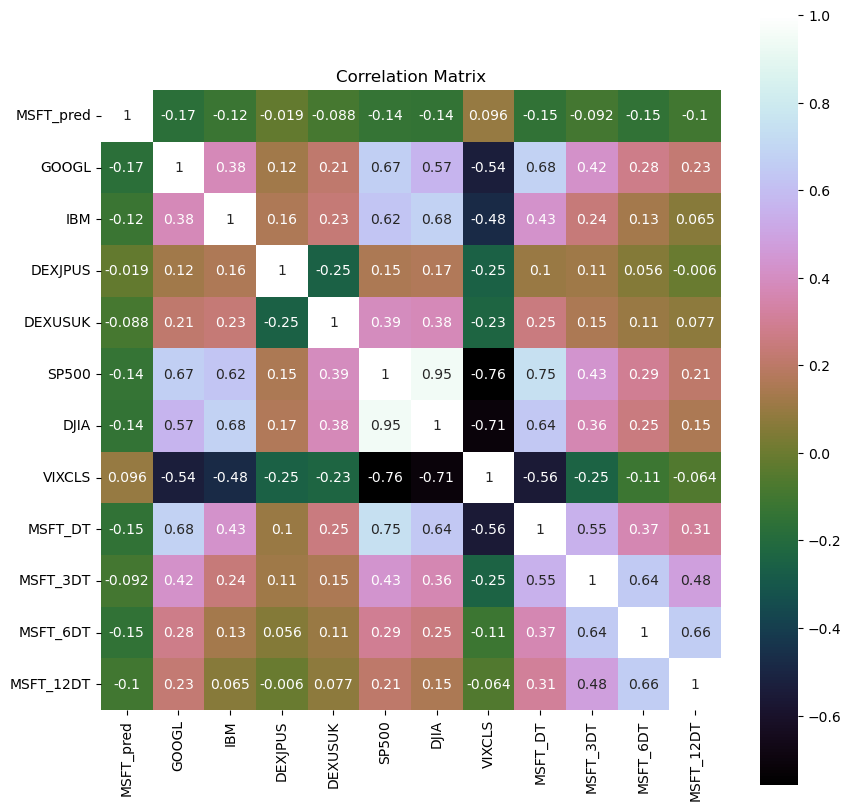

In [66]:
# 計算相關係數
correlation = dataset.corr()
pyplot.figure(figsize=(10,10))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

上方相關係數圖顯示以下之特質:

+ 反應變數 (MSFT_pred)與微軟落後5日, 15日, 30日, 60日報酬具有相關性.

+ 波動率指數(VIX)與許多股票報酬率存在較高的負相關.

**散佈圖矩陣(scatter plot matrix)**

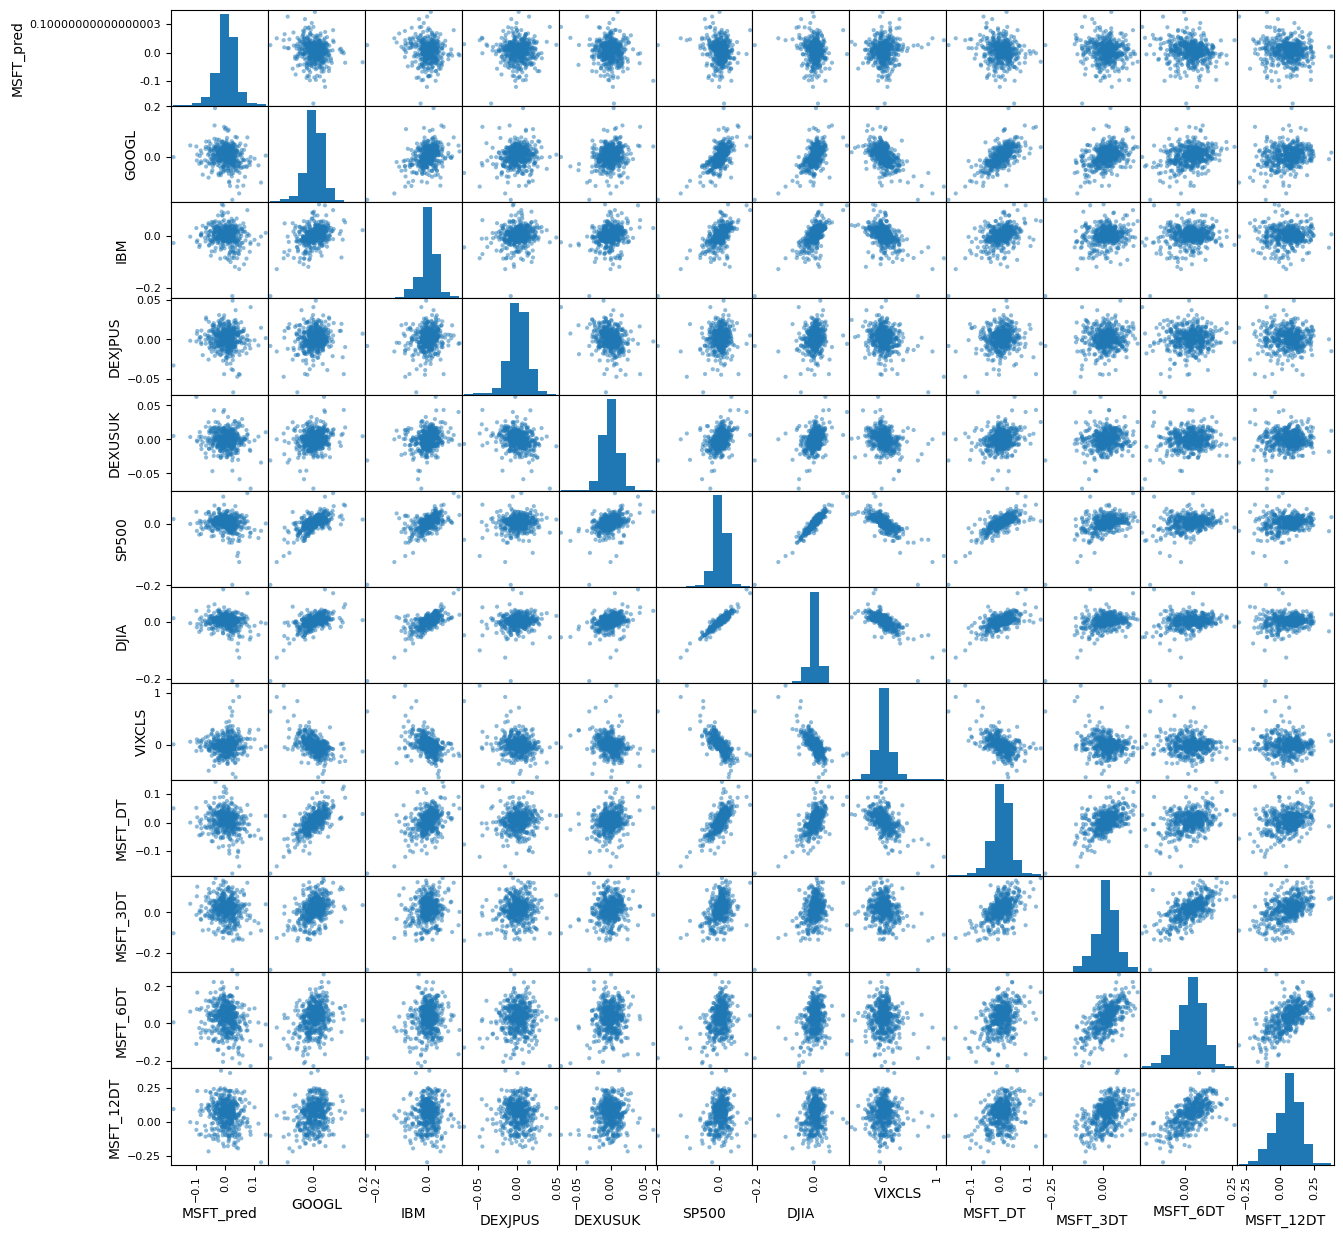

In [69]:
scatter_matrix(dataset, figsize=(15,15))
pyplot.show()

上方散佈圖矩陣顯示以下之特質:

+ 反應變數(MSFT_pred)與微軟落後15日, 30日, 60日報酬具有線性關係.

+ 反應變數(MSFT_pred)與其他自變數無顯著線性關係.

# 3.資料準備

+ 資料準備主要工作是將資料隨機區分為二大類：訓練集（train dataset）與測試集（test dataset）為主。

+ 時間序列值的順序很重要, 資料不可隨機區分, 可以採用任意樣本點做為區分依據.

In [72]:
# 設定測試集比例約 20%, 訓練集個數 = 474*0.8 ~ 379筆資料.
test_size = 0.2
train_size = int(len(X) * (1-test_size))
train_size

379

In [73]:
# 區分自變數訓練集, 測試集
X_train, X_test = X[0:train_size], X[train_size:len(X)]

In [74]:
# 自變數-訓練集
X_train

,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT
2014-10-21 00:00:00+00:00,-0.0196,-0.1187,-0.0042,0.0127,0.0333,0.0182,-0.3487,0.0260,-0.0324,-0.0410,0.0267
2014-10-28 00:00:00+00:00,0.0381,0.0023,0.0121,0.0014,0.0223,0.0233,-0.1110,0.0352,0.0209,-0.0058,0.0757
2014-11-04 00:00:00+00:00,0.0093,-0.0058,0.0491,-0.0103,0.0135,0.0220,0.0342,0.0230,0.0842,0.0215,0.1026
2014-11-12 00:00:00+00:00,0.0041,0.0074,0.0070,-0.0106,0.0072,0.0073,-0.0846,0.0190,0.0945,0.0609,0.0734
2014-11-20 00:00:00+00:00,-0.0231,-0.0133,0.0215,-0.0022,0.0066,0.0037,-0.0153,-0.0122,0.0622,0.0666,0.0882
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-02 00:00:00+00:00,-0.0228,-0.0201,0.0214,-0.0168,-0.0334,-0.0303,-0.0035,-0.0459,-0.1289,-0.0145,-0.0524
2022-09-13 00:00:00+00:00,-0.0236,0.0042,0.0094,-0.0020,0.0062,-0.0013,0.0133,-0.0050,-0.0973,-0.0961,0.0304
2022-09-20 00:00:00+00:00,-0.0310,-0.0075,-0.0046,-0.0106,-0.0197,-0.0129,-0.0040,-0.0386,-0.0898,-0.1430,-0.0970
2022-09-27 00:00:00+00:00,-0.0367,-0.0368,0.0074,-0.0589,-0.0556,-0.0525,0.1826,-0.0252,-0.0688,-0.2141,-0.0914


In [75]:
# 自變數-測試集
X_test

,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT
2022-10-12 00:00:00+00:00,-0.0389,-0.0672,0.0147,-0.0160,-0.0561,-0.0357,0.1620,-0.0988,-0.0568,-0.1526,-0.1373
2022-10-20 00:00:00+00:00,0.0091,0.0521,0.0180,-0.0049,-0.0011,0.0098,-0.0633,0.0081,-0.0057,-0.0905,-0.1272
2022-10-27 00:00:00+00:00,-0.0807,0.0492,-0.0257,0.0250,0.0379,0.0545,-0.0904,-0.0406,-0.0847,-0.0790,-0.2176
2022-11-03 00:00:00+00:00,-0.1002,-0.0022,0.0147,-0.0344,-0.0232,-0.0010,-0.0794,-0.0567,-0.0892,-0.1176,-0.2977
2022-11-10 00:00:00+00:00,0.1186,0.0609,-0.0442,0.0432,0.0616,0.0522,-0.0725,0.1258,0.0285,0.0228,-0.1814
...,...,...,...,...,...,...,...,...,...,...,...
2024-09-03 00:00:00+00:00,-0.0544,0.0165,0.0108,-0.0100,-0.0174,-0.0076,0.2948,-0.0098,0.0082,-0.0768,-0.0344
2024-09-11 00:00:00+00:00,-0.0331,0.0279,-0.0181,-0.0088,0.0062,-0.0028,-0.1866,0.0340,-0.0042,0.0021,-0.0433
2024-09-18 00:00:00+00:00,0.0556,0.0238,0.0015,0.0131,0.0115,0.0156,0.0301,0.0182,0.0402,0.0770,-0.0366
2024-09-25 00:00:00+00:00,0.0105,0.0288,0.0173,0.0105,0.0183,0.0099,-0.1681,0.0030,0.0552,0.0446,-0.0536


In [76]:
# 區分反應變數的訓練集與測試集
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [77]:
# 反應變數-訓練集
Y_train

2014-10-21 00:00:00+00:00    0.0352
2014-10-28 00:00:00+00:00    0.0230
2014-11-04 00:00:00+00:00    0.0270
2014-11-12 00:00:00+00:00   -0.0053
2014-11-20 00:00:00+00:00   -0.0184
                              ...  
2022-09-02 00:00:00+00:00    0.0405
2022-09-13 00:00:00+00:00   -0.0386
2022-09-20 00:00:00+00:00   -0.0252
2022-09-27 00:00:00+00:00    0.0514
2022-10-04 00:00:00+00:00   -0.0990
Name: MSFT_pred, Length: 379, dtype: float64

In [78]:
# 反應變數-測試集
Y_test

2022-10-12 00:00:00+00:00    0.0464
2022-10-20 00:00:00+00:00   -0.0406
2022-10-27 00:00:00+00:00   -0.0567
2022-11-03 00:00:00+00:00    0.1258
2022-11-10 00:00:00+00:00   -0.0026
                              ...  
2024-09-03 00:00:00+00:00    0.0116
2024-09-11 00:00:00+00:00    0.0182
2024-09-18 00:00:00+00:00    0.0030
2024-09-25 00:00:00+00:00   -0.0353
2024-10-02 00:00:00+00:00    0.0008
Name: MSFT_pred, Length: 95, dtype: float64

# 4.建立模型

+ 本研究使用 10折交叉驗證(10-fold cross validation, CV)來決定模型的超參數.

+ 針對數值型預測採用均方誤差指標(mean squared error metric).

In [81]:
num_folds = 10
scoring = 'neg_mean_squared_error'

建立模型方法包括推論統計、機器學習、深度學習與生成式學習等方法。本研究使用監督式學習。

+ LinearRegression: https://en.wikipedia.org/wiki/Linear_regression

+ Lasso: https://en.wikipedia.org/wiki/Lasso_(statistics)

+ ElasticNet: https://en.wikipedia.org/wiki/Elastic_net_regularization

+ KNN (k-nearest neighbors algorithm): https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

+ Decision Tree Regression: https://en.wikipedia.org/wiki/Decision_tree_learning

+ SVR (Support Vector Regression): https://en.wikipedia.org/wiki/Support_vector_machine

In [83]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models

[('LR', LinearRegression()),
 ('LASSO', Lasso()),
 ('EN', ElasticNet()),
 ('KNN', KNeighborsRegressor()),
 ('CART', DecisionTreeRegressor()),
 ('SVR', SVR())]

In [84]:
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)
    
    ## K Fold analysis:
    seed = 168
    kfold = KFold(n_splits=num_folds)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    

    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    
    msg = "%s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)

LR: 0.001224 (0.000645) 0.001135 0.001316
LASSO: 0.001217 (0.000604) 0.001208 0.001326
EN: 0.001217 (0.000604) 0.001208 0.001326
KNN: 0.001359 (0.000655) 0.000913 0.001436
CART: 0.002463 (0.000753) 0.000000 0.002059
SVR: 0.001919 (0.000490) 0.001786 0.002100


**使用交叉驗證比較演算法**

In [86]:
kfold_results

[array([0.00114025, 0.00116097, 0.00053473, 0.00046916, 0.0009282 ,
        0.00093914, 0.00221511, 0.00138561, 0.00089766, 0.00257405]),
 array([0.00119836, 0.00119026, 0.00047531, 0.00041581, 0.00088218,
        0.00097637, 0.00218699, 0.00154144, 0.0009936 , 0.00230772]),
 array([0.00119836, 0.00119026, 0.00047531, 0.00041581, 0.00088218,
        0.00097637, 0.00218699, 0.00154144, 0.0009936 , 0.00230772]),
 array([0.00143793, 0.00119282, 0.00054754, 0.00049969, 0.00104585,
        0.00120831, 0.00230557, 0.00155554, 0.00112122, 0.00267957]),
 array([0.00227491, 0.00336654, 0.00174175, 0.00148755, 0.00180083,
        0.00243457, 0.0034605 , 0.00272138, 0.00173163, 0.00360631]),
 array([0.00185734, 0.00148144, 0.0011979 , 0.00148727, 0.00177238,
        0.00164088, 0.00255892, 0.00278046, 0.00200696, 0.00240663])]

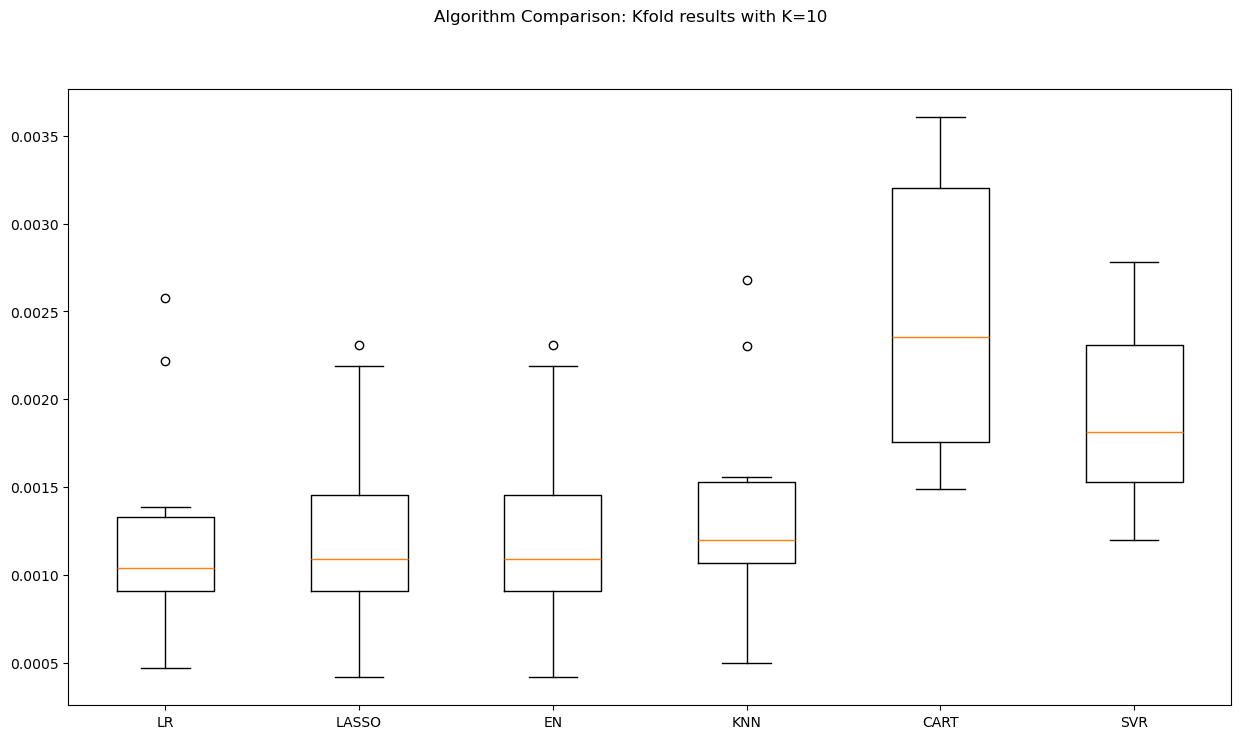

In [87]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results with K=10')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

上方演算法比較圖顯示以下之特質:

+ 儘管幾個模型的結果看起來不錯, 但線性迴歸和正規化迴歸（套索迴歸LASSO, 彈性網路 EN) 似乎表現最好.

+ 結果顯示反應變數和自變數之間存在著線性關係.

# 5.評估與測試

**以下針對訓練集與測試集進行比較**

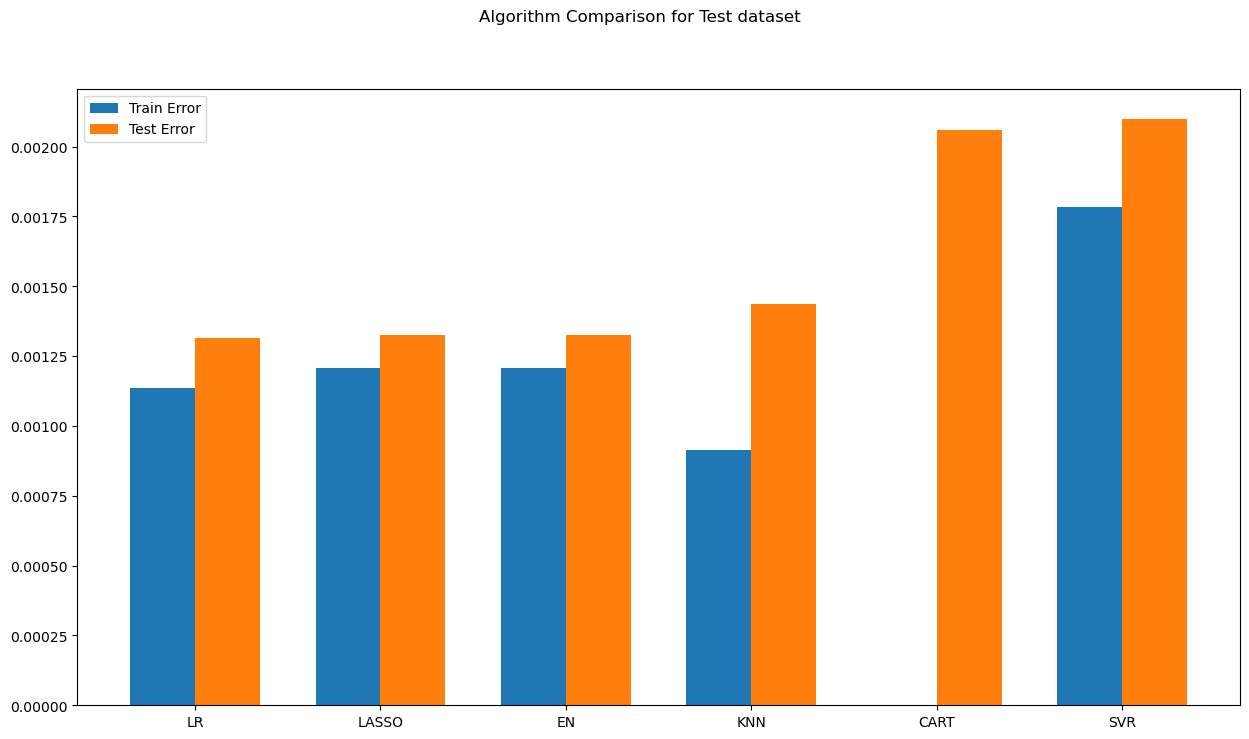

In [91]:
fig = pyplot.figure()
ind = np.arange(len(names)) # the x locations for the groups
width = 0.35 # the width of the bars
fig.suptitle("Algorithm Comparison for Test dataset")
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results, width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

訓練集與測試集的評估結果:
    
+ 針對訓練集與測試集誤差, 線性模型具有較佳的表現.

+ 決策樹迴歸法(CART)訓練資料過度擬合，並在測試集上產生非常高的誤差。

# 6.佈署應用與結論

**結論**

1. 本研究已經完成使用監督式學習建立微軟股票報酬模型做為決策參考.

2. 研究變數包括股票,貨幣與指數相關資料集.

3. 資料採用網路擷取方式獲得.

4. 結果顯示迴歸模型有較佳結果.

**未來議題**

未來研究主題可加入以下二個演算法:

1. 時間序列應用 (Time series: https://en.wikipedia.org/wiki/Time_series)

2. 深度學習-LSTM 應用 (LSTM: https://en.wikipedia.org/wiki/Long_short-term_memory)

# 參考文獻

1. Ming-Chang, Lee. (2024). RWEPA網站. https://rwepa.blogspot.com. Last accessed on October 10, 2024.
2. Python 3.13.0 Reference Documentation. (2024). https://docs.python.org/3/. Last accessed on October 10, 2024.
3. Tatsat, H., Puri, S., & Lookabaugh, B. (2020). Machine Learning and  Data  Science  Blueprints  for  Finance. In O’Reilly Media, Inc.

In [97]:
# end